In [1]:
import time
start_time=time.time()

Abstract

Se presenta el procesamiento de observaciones astronómicas previamente reducidas obtenidas con el instrumento ISIS del WHT. El objetivo es obtener datos útiles viables para aplicar un análisis estadístico.

Se obtiene la velocidad radial mediante la siguiente ecuación:

$$\dfrac{\lambda_{obs}-\lambda}{\lambda}*c + Vhel_{corr} $$

Se obtiene la deconvolución del ancho de linea mediante la ecuación:

$$\sigma_{disp}^{2}=\sigma_{obs}^{2}-\sigma_{inst}^{2}-\sigma_{therm}^{2}$$

donde:

$$ \sigma_{obs} = \frac{0.6006}{1.414}* \frac{Width}{\lambda}*c , \sigma_{therm}^{2} = \frac{166.3}{1.414} \frac{T_{e} \times 10^{-4}}{w}$$

Libraries

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Astronomical observations 

In [3]:
input_file_0='595.Isis.WHT.Red.txt'
input_file_1='595.Isis.WHT.Blue.txt'

ISIS Red Data

In [4]:
data_0R=pd.read_table(input_file_0)#PandasDataFrameOriginalData
data_1R=data_0R.copy()#DataFrameForCalculations
data_1R.head()

,Pos,X,Y,Slit,Archivo,Center,ErrC,Width,ErrW,Peak,...,Line.3,ErrL.3,Center.4,ErrC.4,Width.4,ErrW.4,Peak.4,ErrP.4,Line.4,ErrL.4
0,1.0,199.809,22.0,1.0,595r1_878-001004.xlsx,6562.267,0.211,-4.288,0.464,-31.70,...,8.525,7.594,6726.756,0.296,1.419,0.544,13.700,5.127,20.690,7.479
1,2.0,198.468,22.0,1.0,595r1_878-005008.xlsx,6557.690,0.228,0.882,0.404,16.36,...,18.900,6.029,6725.364,0.150,0.913,0.297,-1.937,4.781,-1.883,-4.577
2,3.0,197.127,22.0,1.0,595r1_878-009012.xlsx,6557.705,0.108,0.970,0.262,35.66,...,7.970,9.081,6724.843,0.551,2.664,1.016,8.852,3.333,25.110,9.367
3,4.0,195.786,22.0,1.0,595r1_878-013016.xlsx,6557.593,0.083,0.916,0.202,41.62,...,17.990,8.705,6725.727,0.605,2.698,1.057,3.842,2.687,11.030,8.172
4,5.0,194.445,22.0,1.0,595r1_878-017020.xlsx,6557.546,0.082,0.813,0.195,40.74,...,-14.250,-5.156,6724.045,0.154,0.948,0.355,-8.792,4.558,-8.870,-5.081


ISIS Blue Data

In [5]:
data_0B=pd.read_table(input_file_1)#PandasDataFrameOriginalData
data_1B=data_0B.copy()#DataFrameForCalculations
data_1B.head()

,Pos,X,Y,Slit,Archivo,Center,ErrC,Width,ErrW,Peak,...,ErrC.2,Width.2,ErrW.2,Peak.2,ErrP.2,Line.2,ErrL.2,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,1.0,214.5600,22.0,1.0,595a1_880-001004.xlsx,4853.837,0.185,0.644,0.374,10.260,...,50.299,176.260,76.337,-2.921,0.7299,-548.000,-348.100,NaN,NaN,NaN
1,2.0,213.1296,22.0,1.0,595a1_880-005008.xlsx,4855.518,0.298,0.287,0.873,-9.238,...,4.219,34.160,8.581,-2.898,0.7155,-105.400,-28.260,NaN,NaN,NaN
2,3.0,211.6992,22.0,1.0,595a1_880-009012.xlsx,4850.115,0.978,-1.573,1.036,3.090,...,1.416,7.574,2.570,-4.309,1.5730,-34.740,-12.440,NaN,NaN,NaN
3,4.0,210.2688,22.0,1.0,595a1_880-013016.xlsx,4514.190,5.551,-282.157,23.988,75.120,...,0.423,1.494,0.762,-5.956,3.1770,-9.471,-5.178,NaN,NaN,NaN
4,5.0,208.8384,22.0,1.0,595a1_880-017020.xlsx,4855.943,0.000,-0.242,0.121,-53.670,...,0.000,0.103,0.000,46700.000,0.0000,5126.000,4659.000,NaN,NaN,NaN


Input data

In [6]:
#Input
Dist=847000#pc
asctopc=(2*np.pi*Dist)/(60*60*360)

#Iraf
corrhelio=25.68#km/s

#Literature
T=7670#K

#Constant
c=299792.459#km/s

#Theory Lambda
lha=6562.8#Angstroms
lhb=4861#Angstroms
loiii=5008#Angstroms
ls=6731#Angstroms
ln=6583#Angstroms

#Atomic Weights
Hw=1.00794#
Nw=14.0067#
Sw=32.065#
Ow=15.9994#

#SigmaInst:Observations
SigmaInstH=18#km/s
SigmaInstN=12#km/s
SigmaInstS=15#km/s
SigmaInstO=19#km/s

#plots Y size
sz=4

Data centered on the region

In [7]:
#mIr=data_1R.Peak>data_1R.Peak.mean()+1*data_1R.Peak.std()
#dataR=data_1R[mIr]

#mIb=data_1B.Peak>data_1B.Peak.mean()+1*data_1B.Peak.std()
#dataB=data_1B[mIb]

mr=(data_1R.X<130)&(data_1R.X>75)
dataR=data_1R[mr]
mb=(data_1B.X<135)&(data_1B.X>85)
dataB=data_1B[mb]

Emission lines Tables

In [8]:
dataHa=dataR[['X','Y','Center','Peak','Width']]
#dataHa.describe()

In [9]:
dataHb=dataB[['X','Y','Center','Peak','Width']]
#dataHb.head()

In [10]:
dataN=dataR[['X','Y','Center.2','Peak.2','Width.2']]
#dataN.describe()

In [11]:
dataS=dataR[['X','Y','Center.4','Peak.4','Width.4']]
#dataS.describe()

In [12]:
dataO=dataB[['X','Y','Center.2','Peak.2','Width.2']]
#dataHb.head()

'Aspect Ratio' plots based on lenght data

In [13]:
wd=dataHa.X.max()-dataHa.X.min()
hd=dataHa.Y.max()-dataHa.Y.min()
ar=wd/hd

In [14]:
wd2=dataO.X.max()-dataO.X.min()
hd2=dataO.Y.max()-dataO.Y.min()
ar2=wd2/hd2

# Ha Emission

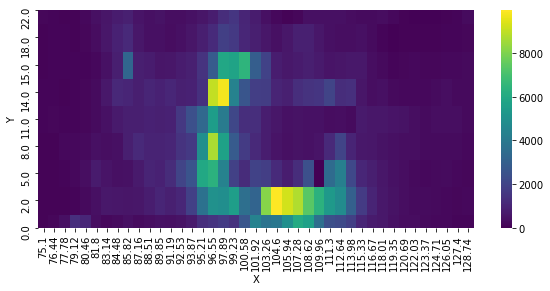

In [15]:
dataHf=(dataHa.round(2)).pivot(index='Y', columns='X', values='Peak')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataHf, cmap="viridis")
plt.gca().invert_yaxis()

/home/zalenovo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


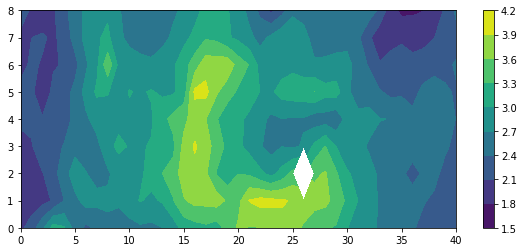

In [16]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.contourf(np.log10(dataHf))
plt.colorbar()

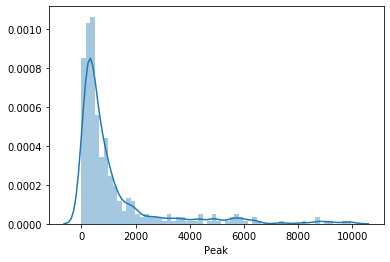

In [17]:
sns.distplot(dataHa.Peak,bins=60)

# Ha Radial velocity 

In [18]:
RVHao=c*(dataHa.Center-lha)/lha

In [19]:
RVHa=RVHao+corrhelio
RVHa.describe()

count       369.000000
mean      -1017.841296
std       15594.515616
min     -299766.779000
25%        -213.594837
50%        -204.641445
75%        -196.555984
max        -177.781268
Name: Center, dtype: float64

In [20]:
dataHa=dataHa.assign(RV=RVHa.values)
dataHa.describe()

,X,Y,Center,Peak,Width,RV
count,369.00000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,101.91600,10.555556,6539.956125,1190.327263,0.995388,-1017.841296
std,15.88847,7.003320,341.381793,1745.710725,0.548868,15594.515616
min,75.09600,0.000000,0.000000,0.000000,-0.948000,-299766.779000
25%,88.50600,5.000000,6557.562000,269.400000,0.935000,-213.594837
50%,101.91600,11.000000,6557.758000,533.400000,1.032000,-204.641445
75%,115.32600,15.000000,6557.935000,1159.000000,1.205000,-196.555984
max,128.73600,22.000000,6558.346000,9957.000000,2.665000,-177.781268


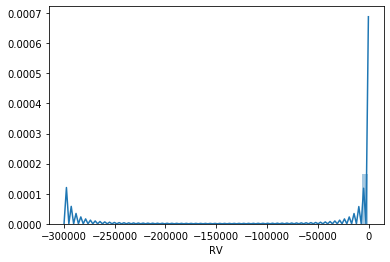

In [21]:
sns.distplot(dataHa.RV,bins=50)

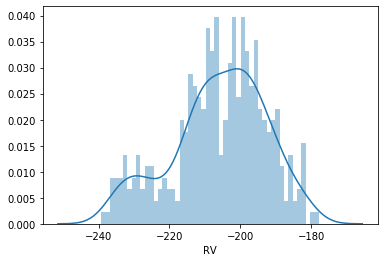

In [22]:
mHrv=dataHa["RV"]>-500
dataHa=dataHa[mHrv]
sns.distplot(dataHa.RV,bins=50)

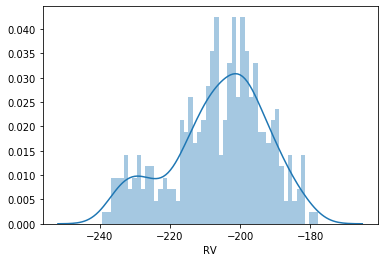

In [151]:
mhrv=dataHa.RV<(dataHa.RV.mean()+3*dataHa.RV.std())
#dataHa.RV=dataHa.RV[mhrv]
sns.distplot(dataHa.RV[mhrv],bins=50)

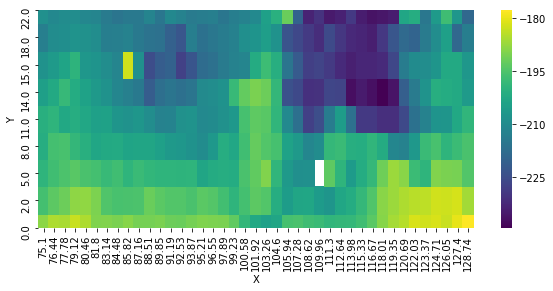

In [24]:
dataHrv=(dataHa.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataHrv, cmap="viridis")
plt.gca().invert_yaxis()

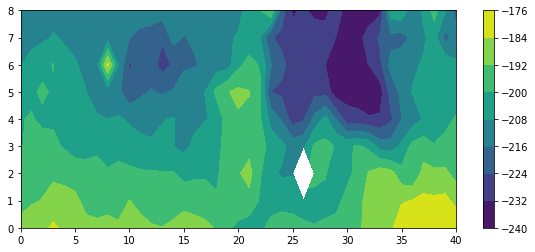

In [25]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.contourf(dataHrv)
plt.colorbar()

# Ha Sig  Width 

In [26]:
mH0=dataHa["Width"]>0
dataHa=dataHa[mH0]

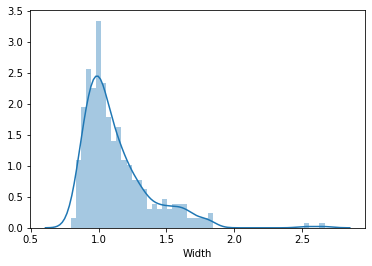

In [27]:
sns.distplot(dataHa.Width,bins=50)

In [28]:
#m2=dataHa.Width>dataHa.Width.mean()+0.5*dataHa.Width.std()
#dataR=data_1R[mIr]
#m2=(dataHa.Width<3)&(dataHa.Width>0)
#sns.distplot(dataHa[m2].Width,bins=30)

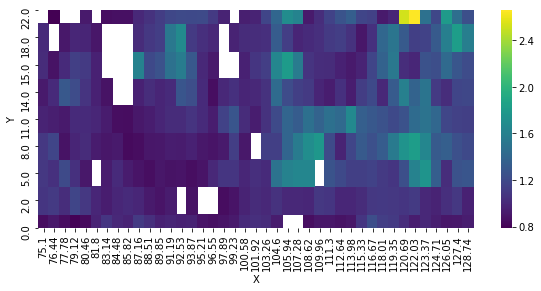

In [29]:
dataHw=(dataHa.round(2)).pivot(index='Y', columns='X', values='Width')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataHw, cmap="viridis")
plt.gca().invert_yaxis()


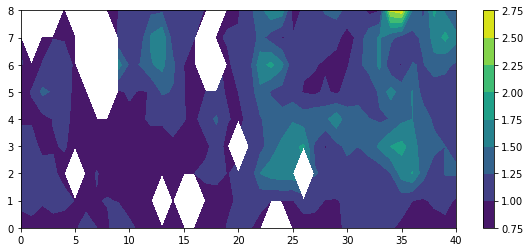

In [30]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.contourf(dataHw)
plt.colorbar()

# Ha Sigma Disp

Sigma obs

In [31]:
a=0.6006/1.414
SigmaObs=a*(dataHa.Width/lha)*c
#SigmaObs

Sigma therm

In [32]:
b=166.3/1.414
SigmaTerm=np.sqrt(b*(T/10000)/Hw)
SigmaTerm

9.46023144605445

In [33]:
SigmaDisp=np.sqrt(SigmaObs**2-SigmaTerm**2-SigmaInstH**2)
SigmaDisp.describe()

/home/zalenovo/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    171.000000
mean      13.721064
std        7.749617
min        1.535415
25%        8.120812
50%       12.118078
75%       18.576127
max       47.542682
Name: Width, dtype: float64

In [34]:
dataHs=dataHa
dataHs=dataHs.assign(SigmaD=SigmaDisp.values)
dataHs.describe()

,X,Y,Center,Peak,Width,RV,SigmaD
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,171.000000
mean,102.773616,10.372093,6557.726706,1137.486628,1.127483,-206.070955,13.721064
std,15.894542,6.929965,0.294485,1712.727418,0.249877,13.452238,7.749617
min,75.096000,0.000000,6557.000000,54.730000,0.794000,-239.267319,1.535415
25%,89.847000,5.000000,6557.556750,267.675000,0.963750,-213.834660,8.120812
50%,103.257000,11.000000,6557.767500,495.200000,1.048000,-204.207479,12.118078
75%,116.667000,15.000000,6557.932500,1070.000000,1.217750,-196.670185,18.576127
max,128.736000,22.000000,6558.346000,9957.000000,2.665000,-177.781268,47.542682


/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/zalenovo/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


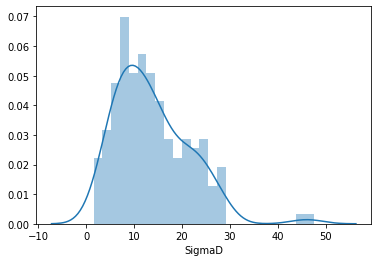

In [35]:
sns.distplot(dataHs.SigmaD,bins=25)

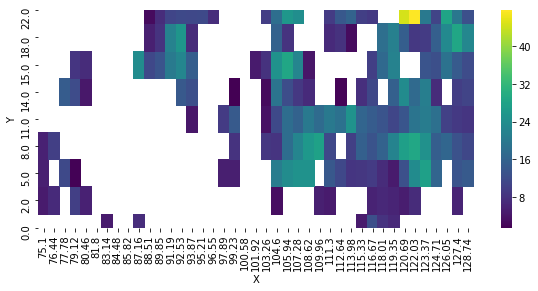

In [36]:
dataHsg=(dataHs.round(2)).pivot(index='Y', columns='X', values='SigmaD')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataHsg, cmap="viridis")
plt.gca().invert_yaxis()

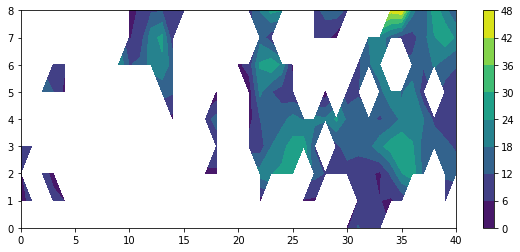

In [37]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.contourf(dataHsg)
plt.colorbar()

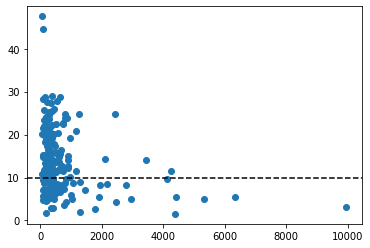

In [38]:
plt.scatter(dataHs.Peak,dataHs.SigmaD)
plt.axhline(y=10, color='k', linestyle='--')

# [NII] 6583 Emission 


In [39]:
dataN.head()

,X,Y,Center.2,Peak.2,Width.2
53,128.736,22.0,6578.231,68.97,0.975
54,127.395,22.0,6578.052,24.03,2.926
55,126.054,22.0,6578.357,17.12,4.370
56,124.713,22.0,6577.651,13.26,3.216
57,123.372,22.0,6577.604,11.15,3.398


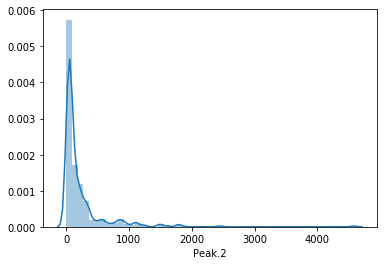

In [40]:
sns.distplot(dataN["Peak.2"],bins=50)

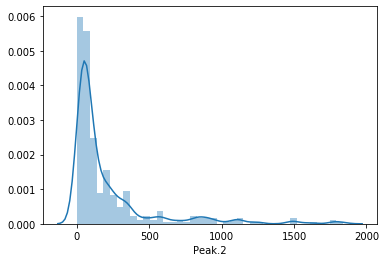

In [41]:
mnf=dataN["Peak.2"]<2000
#mnf=dataN["Peak.2"]>dataN["Peak.2"].mean()+1.0*dataN["Peak.2"].std()
dataN=dataN[mnf]
sns.distplot(dataN["Peak.2"],bins=40)

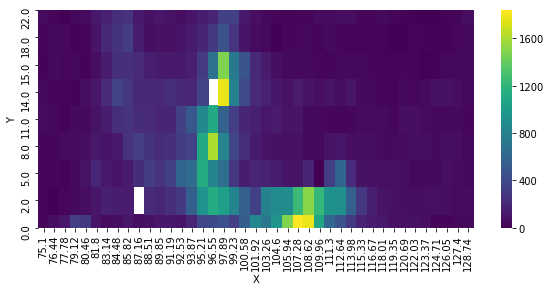

In [42]:
dataNf=(dataN.round(2)).pivot(index='Y', columns='X', values='Peak.2')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataNf, cmap="viridis")
plt.gca().invert_yaxis()


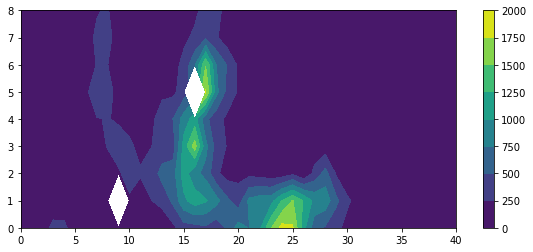

In [43]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.contourf(dataNf)
plt.colorbar()

# [NII] Radial velocity 

In [44]:
RVNo=c*((dataN["Center.2"]-ln)/ln)
#RVNo.describe()

Corr. Hel.

In [45]:
RVN=RVNo+corrhelio
#RVN.describe()

In [46]:
dataN=dataN.assign(RV=RVN.values)

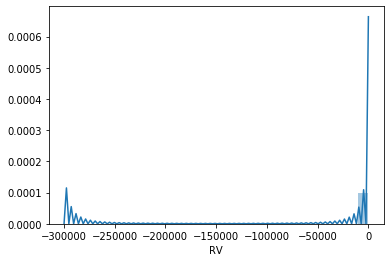

In [47]:
sns.distplot(dataN.RV,bins=30)

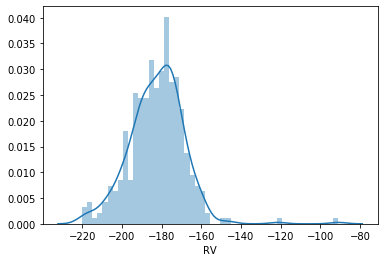

In [48]:
mNrv=dataN["RV"]>-500
dataN=dataN[mNrv]
sns.distplot(dataN.RV,bins=50)

Data Adjust

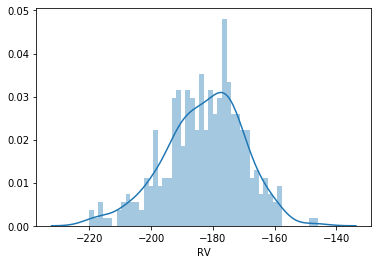

In [49]:
mn=dataN.RV<dataN.RV.mean()+3*dataN.RV.std()
sns.distplot(dataN[mn].RV,bins=50)

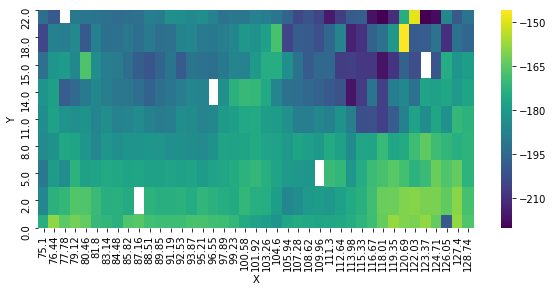

In [50]:
dataNrv=(dataN[mn].round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataNrv, cmap="viridis")
plt.gca().invert_yaxis()

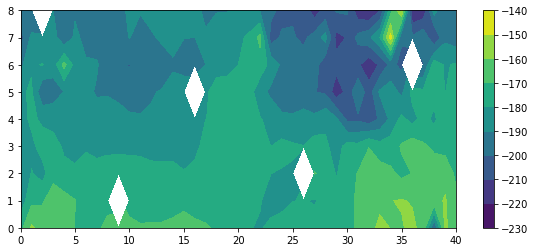

In [51]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.contourf(dataNrv)
plt.colorbar()

# [NII] 6584 Sig Width

In [52]:
mn0=dataN["Width.2"]>0
dataN=dataN[mn0]

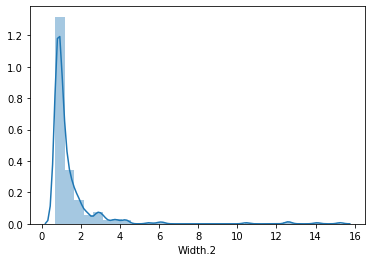

In [53]:
sns.distplot(dataN["Width.2"],bins=30)

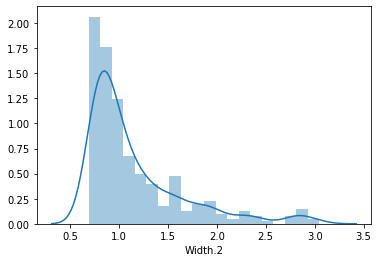

In [54]:
mns=dataN["Width.2"]<(dataN["Width.2"].mean()+1*dataN["Width.2"].std())
dataN=dataN[mns]
sns.distplot(dataN["Width.2"][mns],bins=20)

/home/zalenovo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


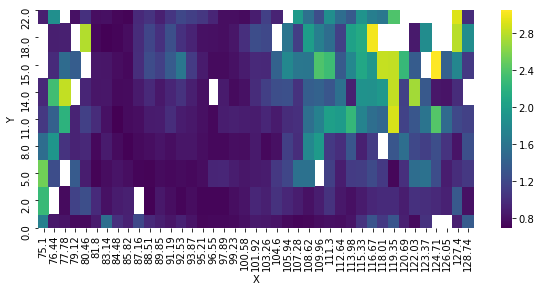

In [55]:
dataNw=(dataN[mns].round(2)).pivot(index='Y', columns='X', values='Width.2')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataNw, cmap="viridis")
plt.gca().invert_yaxis()

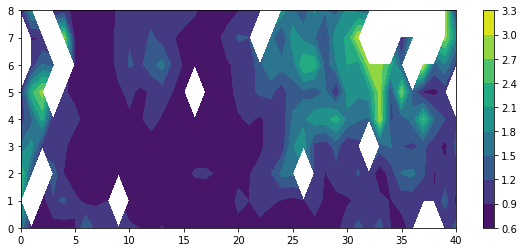

In [56]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.contourf(dataNw)
plt.colorbar()

#  [NII] 6584 Sigma Disp

In [57]:
a=0.6006/1.414
SigmaObsN=a*(dataN["Width.2"]/lha)*c
SigmaObsN

53      18.917863
54      56.772991
60      46.450629
61      31.549174
62      32.732753
          ...    
1289    14.571605
1290    14.513396
1291    15.638766
1292    16.376078
1293    33.159618
Name: Width.2, Length: 341, dtype: float64

In [58]:
SigmaTermN=np.sqrt(166.3*(T/10000)/(Nw*1.414))
SigmaTermN

2.537763743450441

In [59]:
SigmaDispN=np.sqrt(SigmaObsN**2-SigmaTermN**2-SigmaInstN**2)
SigmaDispN.describe()

count    341.000000
mean      17.944925
std       11.280480
min        5.317879
25%        9.764529
50%       14.147144
75%       22.506048
max       57.854274
Name: Width.2, dtype: float64

In [60]:
dataN=dataN.assign(SigmaD=SigmaDispN.values)
dataN.describe()

,X,Y,Center.2,Peak.2,Width.2,RV,SigmaD
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,101.569935,10.228739,6578.423434,224.685894,1.157065,-182.738649,17.944925
std,15.424636,6.885654,0.266786,320.609785,0.503905,12.149557,11.280480
min,75.096000,0.000000,6577.603000,17.510000,0.689000,-220.101544,5.317879
25%,88.506000,5.000000,6578.250000,48.140000,0.808000,-190.636904,9.764529
50%,101.916000,11.000000,6578.449000,93.780000,0.965000,-181.574364,14.147144
75%,113.985000,15.000000,6578.607000,241.400000,1.321000,-174.378981,22.506048
max,128.736000,22.000000,6578.972000,1839.000000,3.048000,-157.756735,57.854274


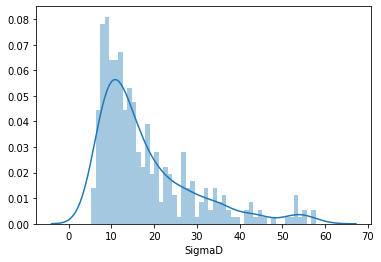

In [61]:
sns.distplot(dataN.SigmaD,bins=50)

In [62]:
#fig, ax = plt.subplots(figsize=(sz*ar,sz))
#plt.scatter(dataN.X,dataN.Y,c=dataN.SigmaD, s=300)
#plt.axis('equal')
#ax.set_xlim(65,145)

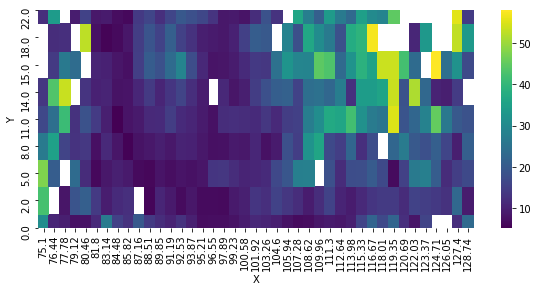

In [63]:
dataNs=(dataN.round(2)).pivot(index='Y', columns='X', values='SigmaD')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataNs, cmap="viridis")
plt.gca().invert_yaxis()


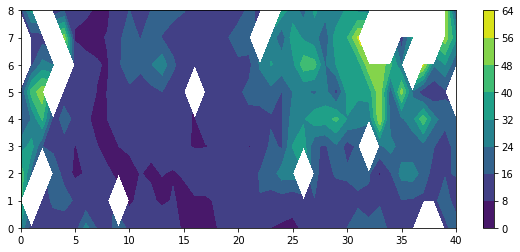

In [64]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.contourf(dataNs)
plt.colorbar()

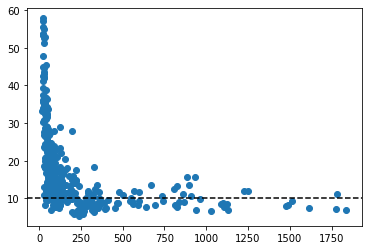

In [65]:
plt.scatter(dataN["Peak.2"],dataN.SigmaD)
plt.axhline(y=10, color='k', linestyle='--')

# [SII] Emission 


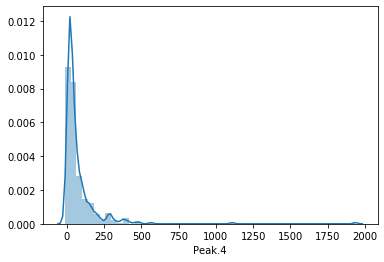

In [66]:
sns.distplot(dataS["Peak.4"],bins=50)

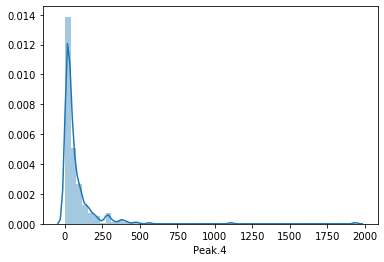

In [67]:
ms0=dataS["Peak.4"]>0
dataS=dataS[ms0]
sns.distplot(dataS["Peak.4"],bins=50)

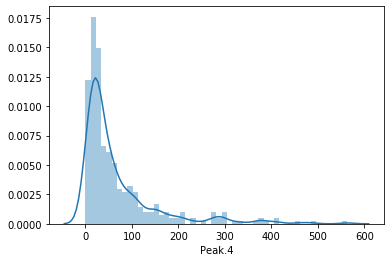

In [68]:
msf=(dataS["Peak.4"]<1000)
dataS=dataS[msf]
sns.distplot(dataS["Peak.4"],bins=50)

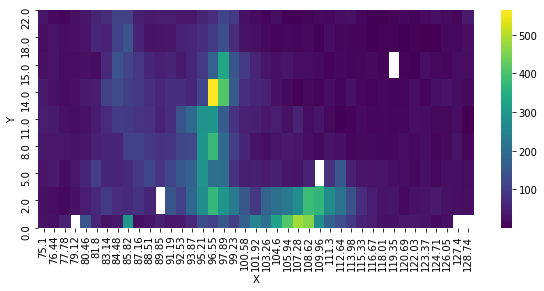

In [69]:
dataSf=(dataS.round(2)).pivot(index='Y', columns='X', values='Peak.4')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataSf, cmap="viridis")
plt.gca().invert_yaxis()


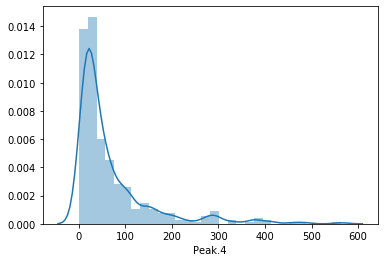

In [70]:
sns.distplot(dataS["Peak.4"],bins=30)

# [SII] Radial velocity 

In [71]:
RVSo=c*(dataS["Center.4"]-ls)/ls
RVS=RVSo+corrhelio
#RVS.describe()

In [72]:
dataS=dataS.assign(RV=RVS.values)
dataS

,X,Y,Center.4,Peak.4,Width.4,RV
53,128.736,22.0,6726.088,41.30,0.830,-193.095896
54,127.395,22.0,6726.306,10.42,0.743,-183.386380
55,126.054,22.0,6726.850,16.85,0.898,-159.157127
56,124.713,22.0,6726.034,22.71,0.461,-195.501006
57,123.372,22.0,6724.991,16.65,-0.657,-241.955253
...,...,...,...,...,...,...
1288,81.801,0.0,6726.553,58.54,0.741,-172.385230
1289,80.460,0.0,6726.630,145.90,0.728,-168.955722
1291,77.778,0.0,6726.680,52.22,-0.816,-166.728769
1292,76.437,0.0,6726.566,23.77,0.690,-171.806222


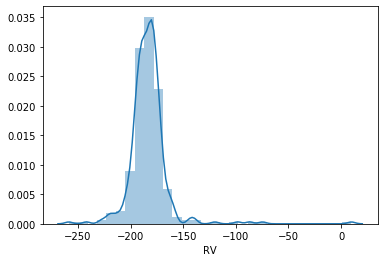

In [73]:
sns.distplot(dataS.RV,bins=30)

In [74]:
ms1=dataS.RV>-250
dataS=dataS[ms1]

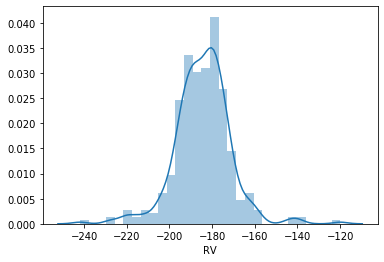

In [75]:
msrv=dataS.RV<dataS.RV.mean()+4*dataS.RV.std()
#msrv=(dataS["RV"]<-180)&(dataS["RV"]>-300)
sns.distplot(dataS.RV[msrv],bins=30)

In [76]:
#fig, ax = plt.subplots(figsize=(sz*ar,sz))
#plt.scatter(dataS.X,dataS.Y,c=dataS.RV, s=300)
#plt.axis('equal')

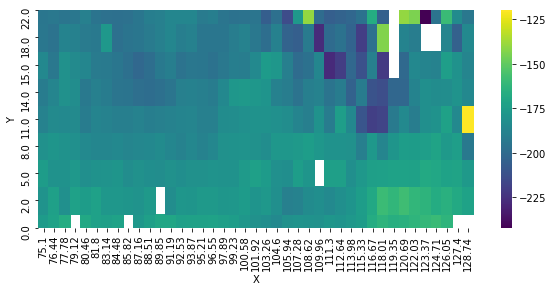

In [77]:
dataSrv=(dataS[msrv].round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataSrv, cmap="viridis")
plt.gca().invert_yaxis()

In [78]:
#dataS=dataS[msrv]

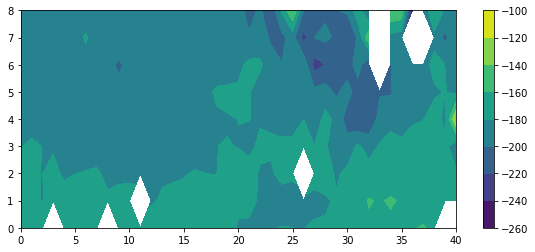

In [79]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.contourf(dataSrv)
plt.colorbar()

# [SII] Width

In [80]:
ms1=dataS["Width.4"]>0
dataS=dataS[ms1]

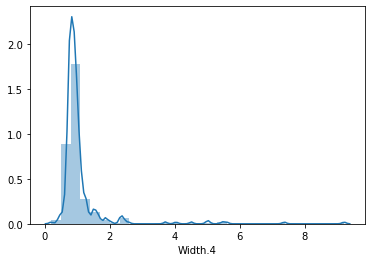

In [81]:
sns.distplot(dataS["Width.4"],bins=30)

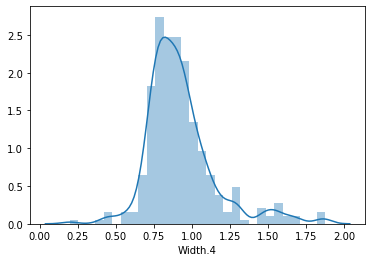

In [82]:
mss=dataS["Width.4"]<(dataS["Width.4"].mean()+1*dataS["Width.4"].std())
sns.distplot(dataS["Width.4"][mss],bins=30)

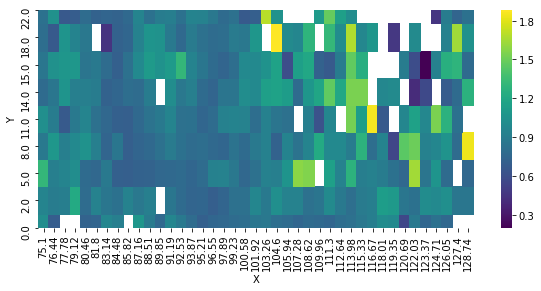

In [83]:
dataSw=(dataS[mss].round(2)).pivot(index='Y', columns='X', values='Width.4')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataSw, cmap="viridis")
plt.gca().invert_yaxis()

In [84]:
dataS=dataS[mss]

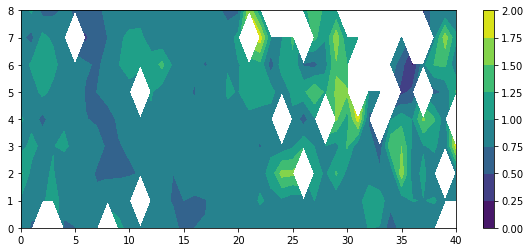

In [85]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.contourf(dataSw)
plt.colorbar()

# [SII] Sig Disp

In [86]:
a=0.6006/1.414
SigmaObsS=a*(dataS["Width.4"]/ln)*c
#SigmaObsS

In [87]:
SigmaTermS=np.sqrt(166.3*(T/10000)/(Sw*1.414))
SigmaTermS

1.677271933195367

In [88]:
SigmaDispS=np.sqrt(SigmaObsS**2-SigmaTermS**2-SigmaInstS**2)
SigmaDispS.describe()

count    250.000000
mean      11.032009
std        6.270785
min        0.643478
25%        6.994334
50%        9.911813
75%       13.648404
max       32.979051
Name: Width.4, dtype: float64

In [89]:
dataS=dataS.assign(SigmaD=SigmaDispS.values)
dataS.describe()

,X,Y,Center.4,Peak.4,Width.4,RV,SigmaD
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,250.000000
mean,100.804541,10.186186,6726.289946,72.627231,0.924279,-184.101412,11.032009
std,15.656828,6.834193,0.277567,88.233552,0.228628,12.362566,6.270785
min,75.096000,0.000000,6725.315000,1.660000,0.199000,-227.524595,0.643478
25%,87.165000,5.000000,6726.135000,20.680000,0.781000,-191.002560,6.994334
50%,100.575000,11.000000,6726.296000,37.200000,0.879000,-183.831770,9.911813
75%,113.985000,15.000000,6726.442000,90.080000,0.999000,-177.329067,13.648404
max,128.736000,22.000000,6728.748000,563.600000,1.875000,-74.621979,32.979051


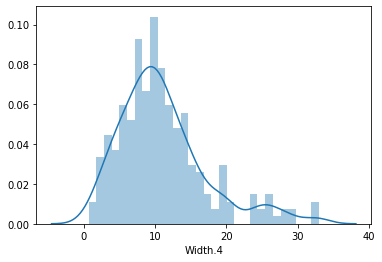

In [90]:
sns.distplot(SigmaDispS,bins=30)

In [91]:
#fig, ax = plt.subplots(figsize=(sz*ar,sz))
#plt.scatter(dataS.X,dataS.Y,c=dataS.SigmaD, s=300)
#plt.axis('equal')
#ax.set_xlim(65,145)

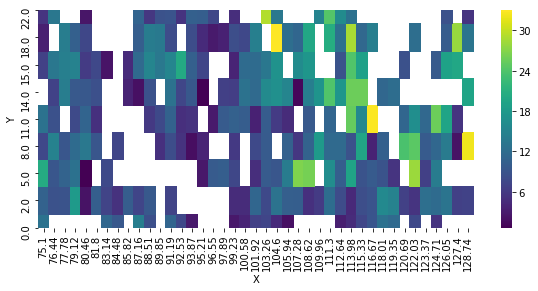

In [92]:
dataSsd=(dataS.round(2)).pivot(index='Y', columns='X', values='SigmaD')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataSsd, cmap="viridis")
plt.gca().invert_yaxis()

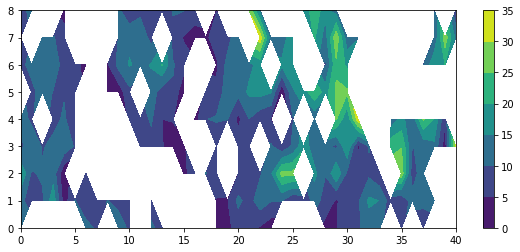

In [93]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.contourf(dataSsd)
plt.colorbar()

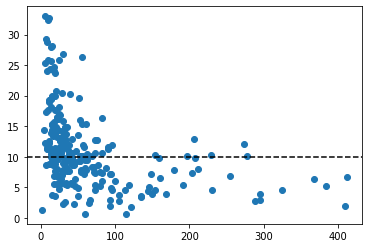

In [94]:
plt.scatter(dataS["Peak.4"],dataS.SigmaD)
plt.axhline(y=10, color='k', linestyle='--')

# Hbeta Emission 

In [95]:
dataHb.describe()

,X,Y,Center,Peak,Width
count,315.000000,315.000000,315.000000,315.000000,315.000000
mean,110.140800,10.555556,4791.700857,-474.277717,13.278743
std,14.469317,7.004952,545.473686,6003.937856,109.251118
min,85.824000,0.000000,0.000000,-96890.000000,-868.597000
25%,97.267200,5.000000,4857.400000,9.807500,0.762500
50%,110.140800,11.000000,4857.629000,18.850000,1.013000
75%,123.014400,15.000000,4857.812500,34.555000,1.585500
max,134.457600,22.000000,4878.466000,307.100000,896.705000


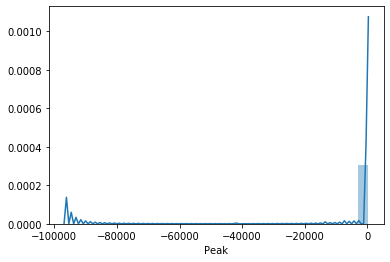

In [96]:
sns.distplot(dataHb.Peak,bins=30)

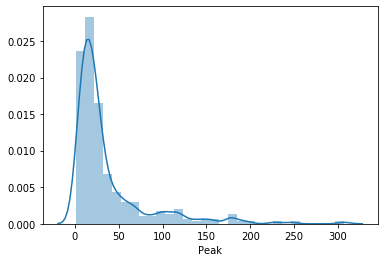

In [97]:
mfhb=(dataHb.Peak>0)
sns.distplot(dataHb[mfhb].Peak,bins=30)

In [98]:
dataHb=dataHb[mfhb]

/home/zalenovo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


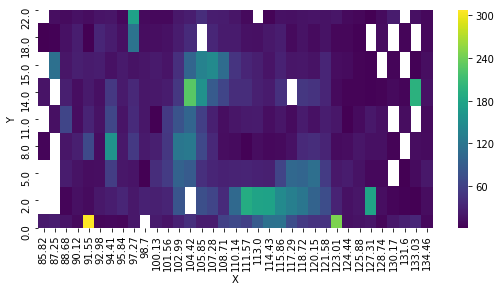

In [99]:
dataOf=(dataHb[mfhb].round(2)).pivot(index='Y', columns='X', values='Peak')
fig, ax = plt.subplots(figsize=(sz*ar2,sz))
sns.heatmap(dataOf, cmap="viridis")
plt.gca().invert_yaxis()

# Hbeta Radial velocity

In [100]:
RVHbo=c*(dataHb.Center.dropna()-lhb)/lhb

In [101]:
RVHb=RVHbo+corrhelio
RVHb.describe()

count      291.000000
mean      -466.579272
std       2303.167044
min     -27587.974592
25%       -194.646797
50%       -180.986227
75%       -170.964364
max       1102.860640
Name: Center, dtype: float64

In [102]:
dataHb=dataHb.assign(RV=RVHb.values)
dataHb

,X,Y,Center,Peak,Width,RV
56,134.4576,22.0,4857.616,8.391,1.943,-183.021436
57,133.0272,22.0,4857.968,13.840,0.871,-161.312540
59,130.1664,22.0,4827.780,23.980,896.705,-2023.097101
60,128.7360,22.0,4858.818,9.692,0.893,-108.890489
61,127.3056,22.0,4871.610,1.803,19.361,680.030543
...,...,...,...,...,...,...
1286,91.5456,0.0,4857.892,307.100,-0.174,-165.999688
1287,90.1152,0.0,4858.299,8.549,1.602,-140.898776
1288,88.6848,0.0,4845.765,16.790,428.232,-913.908174
1289,87.2544,0.0,4858.085,25.330,0.801,-154.096799


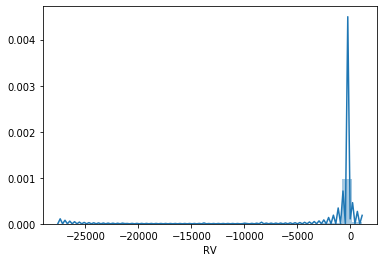

In [103]:
sns.distplot(dataHb.RV,bins=30)

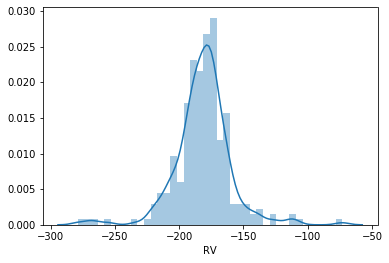

In [104]:
mHb1=(dataHb.RV>-250)&(dataHb.RV<0)
dataHb=dataHb[mHb1]
sns.distplot(dataHb.RV,bins=40)

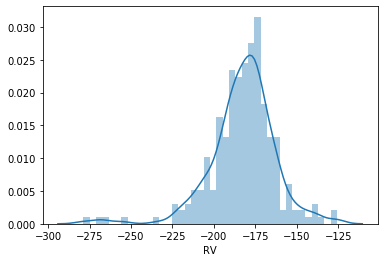

In [105]:
mvhb=dataHb.RV<dataHb.RV.mean()+3*dataHb.RV.std()
sns.distplot(dataHb.RV[mvhb],bins=40)

In [106]:
#fig, ax = plt.subplots(figsize=(14,5))
#plt.scatter(dataHb[mvhb].X,dataHb[mvhb].Y,c=dataHb[mvhb].RV, s=300)
#plt.axis('equal')

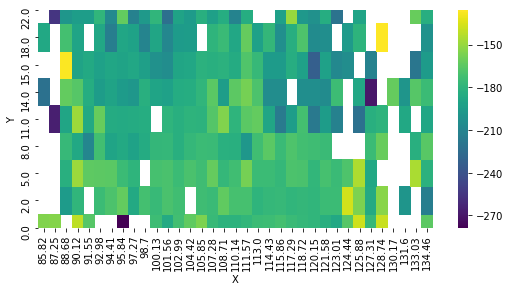

In [107]:
dataHbrv=(dataHb[mvhb].round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(sz*ar2,sz))
sns.heatmap(dataHbrv, cmap="viridis")
plt.gca().invert_yaxis()

In [108]:
dataHb=dataHb[mvhb]

# Hbeta Width

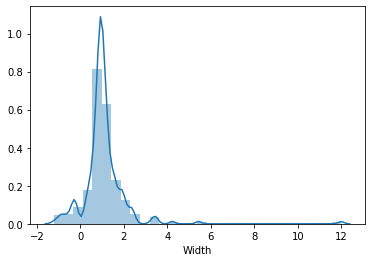

In [109]:
sns.distplot(dataHb.Width,bins=30)

In [110]:
mHb2=(dataHb["Width"]>0)&(dataHb["Width"]<6)
dataHb=dataHb[mHb2]

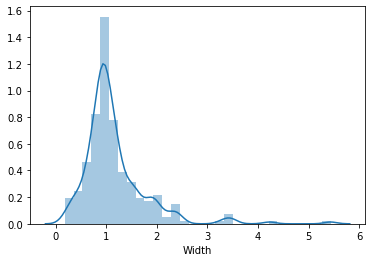

In [111]:
sns.distplot(dataHb.Width,bins=30)

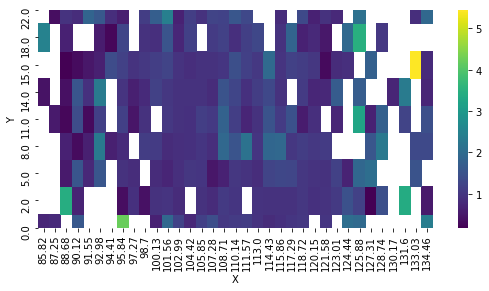

In [112]:
dataHbw=(dataHb.round(2)).pivot(index='Y', columns='X', values='Width')
fig, ax = plt.subplots(figsize=(sz*ar2,sz))
sns.heatmap(dataHbw, cmap="viridis")
plt.gca().invert_yaxis()

In [113]:
#dataHb=dataHb[mshb]

# Hbeta Sig Disp

In [114]:
a=0.6006/1.414
SigmaObsHb=a*(dataHb.Width/lhb)*c
SigmaObsHb

56       50.898362
57       22.816507
62       55.587403
64       20.773238
65       24.676406
           ...    
1280     17.263006
1283    110.781869
1287     41.965607
1289     20.982804
1290     19.646820
Name: Width, Length: 235, dtype: float64

In [115]:
#Sigma therm
SigmaTermH=np.sqrt(166.3*(T/10000)/(Hw*1.414))
SigmaTermH

9.460231446054452

In [116]:
#dataHbs=dataHb
SigmaDispHb=np.sqrt(SigmaObsHb**2-SigmaTerm**2-SigmaInstH**2)
SigmaDispHb.describe()

count    187.000000
mean      25.911648
std       19.283408
min        2.478447
25%       13.886692
50%       20.527124
75%       33.300913
max      140.914326
Name: Width, dtype: float64

In [117]:
dataHb=dataHb.assign(SigmaD=SigmaDispHb.values)
dataHb.describe()

,X,Y,Center,Peak,Width,RV,SigmaD
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,187.000000
mean,109.282560,10.646809,4857.623723,36.069719,1.159711,-182.545111,25.911648
std,12.943504,6.800479,0.317066,38.108872,0.643690,19.554438,19.283408
min,85.824000,0.000000,4856.064000,2.401000,0.176000,-278.737934,2.478447
25%,98.697600,5.000000,4857.473500,13.480000,0.829000,-191.809839,13.886692
50%,108.710400,11.000000,4857.652000,22.090000,0.997000,-180.801208,20.527124
75%,118.723200,15.000000,4857.790500,39.830000,1.310000,-172.259497,33.300913
max,134.457600,22.000000,4858.542000,228.100000,5.435000,-125.912237,140.914326


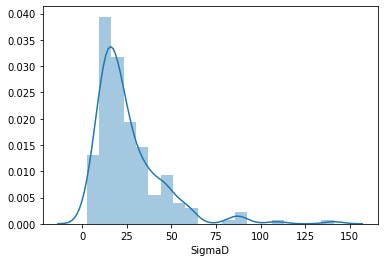

In [118]:
sns.distplot(dataHb.SigmaD,bins=20)

In [119]:
#fig, ax = plt.subplots(figsize=(14,5))
#plt.scatter(dataHb.X,dataHb.Y,c=dataHb.SigmaD, s=300)
#plt.axis('equal')


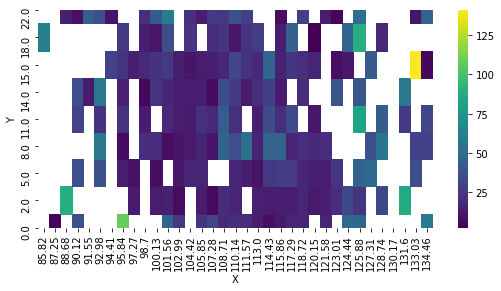

In [120]:
dataHbsg=(dataHb.round(2)).pivot(index='Y', columns='X', values='SigmaD')
fig, ax = plt.subplots(figsize=(sz*ar2,sz))
sns.heatmap(dataHbsg, cmap="viridis")
plt.gca().invert_yaxis()

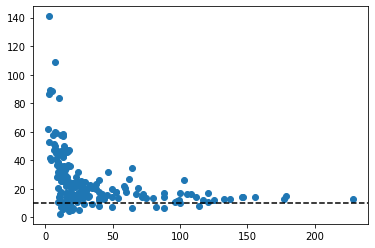

In [121]:
plt.scatter(dataHb.Peak,dataHb.SigmaD)
plt.axhline(y=10, color='k', linestyle='--')

# [OIII] 5007 Emission 

In [122]:
dataO.head()

,X,Y,Center.2,Peak.2,Width.2
56,134.4576,22.0,5001.840,13.440,0.256
57,133.0272,22.0,5004.802,35.070,0.179
58,131.5968,22.0,5001.756,-7.618,-1.041
59,130.1664,22.0,5003.374,4.702,3.859
60,128.7360,22.0,5003.031,3.822,2.517


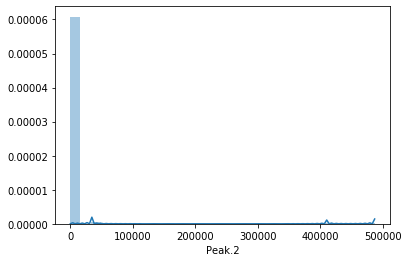

In [123]:
sns.distplot(dataO["Peak.2"],bins=30)

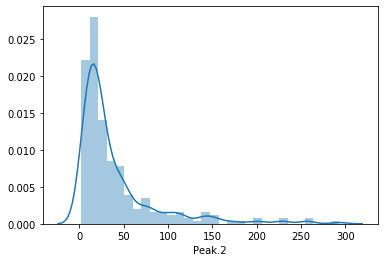

In [124]:
mof=(dataO["Peak.2"]>0)&(dataO["Peak.2"]<1000)
sns.distplot(dataO["Peak.2"][mof],bins=30)

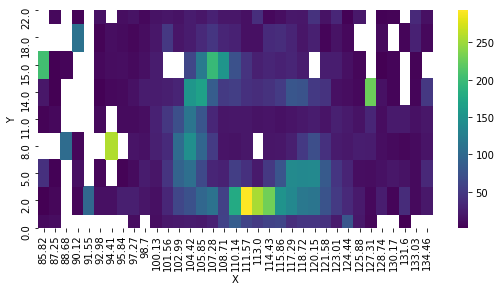

In [125]:
dataOf=(dataO[mof].round(2)).pivot(index='Y', columns='X', values='Peak.2')
fig, ax = plt.subplots(figsize=(sz*ar2,sz))
sns.heatmap(dataOf, cmap="viridis")
plt.gca().invert_yaxis()

In [126]:
dataO=dataO[mof]

# [OIII] 5007 Radial velocity 

In [127]:
RVOo=c*((dataO["Center.2"]-loiii)/loiii)
RVOo.describe()

count    265.000000
mean    -289.823397
std       56.336584
min     -840.472469
25%     -306.377357
50%     -290.573601
75%     -279.738451
max      139.480118
Name: Center.2, dtype: float64

In [128]:
RVO=RVOo+corrhelio
RVO.describe()

count    265.000000
mean    -264.143397
std       56.336584
min     -814.792469
25%     -280.697357
50%     -264.893601
75%     -254.058451
max      165.160118
Name: Center.2, dtype: float64

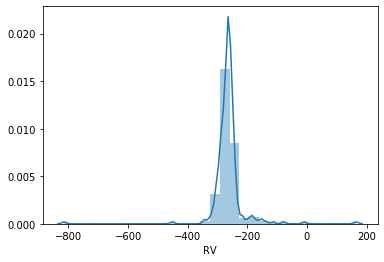

In [129]:
dataO=dataO.assign(RV=RVO.values)
sns.distplot(dataO.RV,bins=30)

In [130]:
mO1=(dataO.RV>-350)&(dataO.RV<-200)
dataO=dataO[mO1]

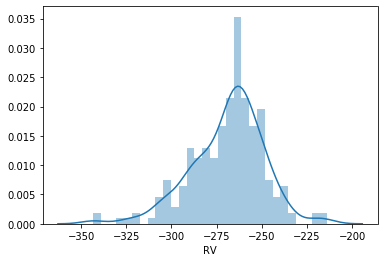

In [131]:
morv=dataO.RV<dataO.RV.mean()+3*dataO.RV.std()
sns.distplot(dataO[morv].RV,bins=30)

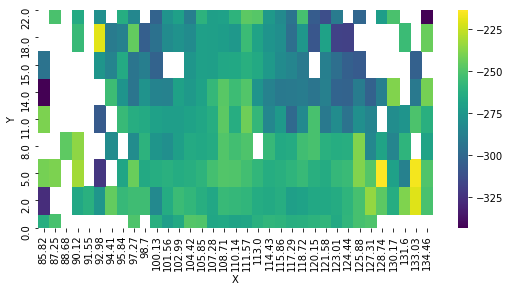

In [132]:
dataOrv=(dataO[morv].round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(sz*ar2,sz))
sns.heatmap(dataOrv, cmap="viridis")
plt.gca().invert_yaxis()

In [133]:
dataO=dataO[morv]

# [OIII] 5007 Width

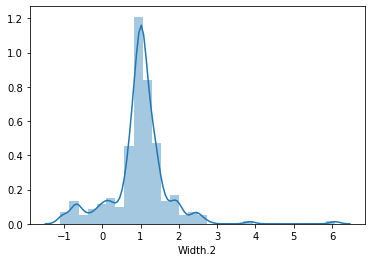

In [134]:
sns.distplot(dataO["Width.2"],bins=30)

In [135]:
mos=(dataO["Width.2"]>0)
dataO=dataO[mos]

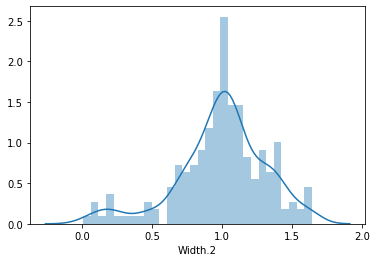

In [136]:
mos=dataO["Width.2"]<(dataO["Width.2"].mean()+1*dataO["Width.2"].std())
sns.distplot(dataO["Width.2"][mos],bins=30)

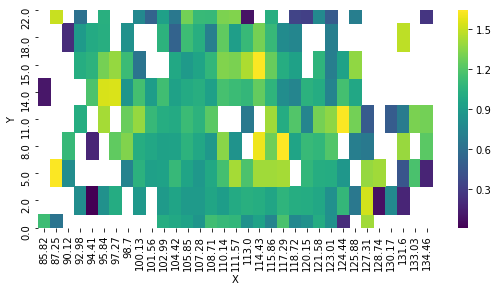

In [137]:
dataOs=(dataO[mos].round(2)).pivot(index='Y', columns='X', values='Width.2')
fig, ax = plt.subplots(figsize=(sz*ar2,sz))
sns.heatmap(dataOs, cmap="viridis")
plt.gca().invert_yaxis()

In [138]:
dataO=dataO[mos]

# [OIII] 5007 Sigma Disp

In [139]:
a=0.6006/1.414
SigmaObsO=a*(dataO["Width.2"][mos]/lhb)*c
SigmaObsO

56       6.706115
62      18.206053
64      12.390594
65      20.563672
66       8.251664
          ...    
1276    24.781189
1277    25.907607
1278    26.824458
1289    16.791482
1290    29.679796
Name: Width.2, Length: 202, dtype: float64

In [140]:
SigmaTermO=np.sqrt(166.3*(T/10000)/(Ow*1.414))
SigmaTermO

2.3744730989181915

In [141]:
SigmaDispO=np.sqrt(SigmaObsO**2-SigmaTermO**2-SigmaInstO**2)
SigmaDispO.describe()

count    171.000000
mean      20.561189
std        7.893794
min        2.468630
25%       15.834047
50%       19.892015
75%       26.141751
max       38.457943
Name: Width.2, dtype: float64

In [142]:
dataO=dataO.assign(SigmaD=SigmaDispO.values)
dataO.describe()

,X,Y,Center.2,Peak.2,Width.2,RV,SigmaD
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,171.000000
mean,111.457901,10.227723,5003.077540,44.977797,0.993802,-268.991826,20.561189
std,11.625324,6.803396,0.317933,48.278333,0.318946,19.032316,7.893794
min,85.824000,0.000000,5001.834000,3.997000,0.010000,-343.433479,2.468630
25%,102.988800,5.000000,5002.892250,16.065000,0.840750,-280.083764,15.834047
50%,111.571200,11.000000,5003.136500,26.560000,1.019000,-265.462297,19.892015
75%,120.153600,15.000000,5003.273000,51.610000,1.171750,-257.291037,26.141751
max,134.457600,22.000000,5003.999000,293.000000,1.640000,-213.830709,38.457943


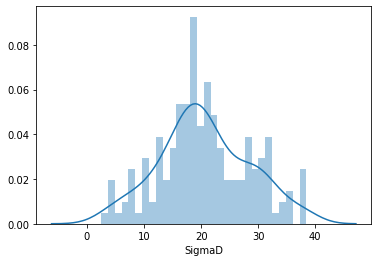

In [143]:
sns.distplot(dataO.SigmaD,bins=30)

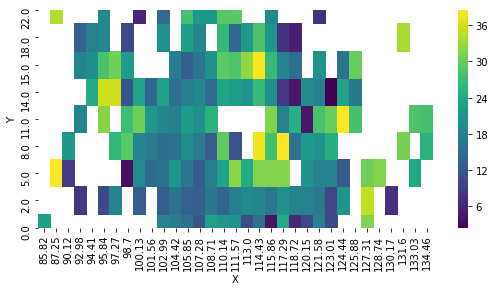

In [144]:
dataOsd=(dataO.round(2)).pivot(index='Y', columns='X', values='SigmaD')
fig, ax = plt.subplots(figsize=(sz*ar2,sz))
sns.heatmap(dataOsd, cmap="viridis")
plt.gca().invert_yaxis()

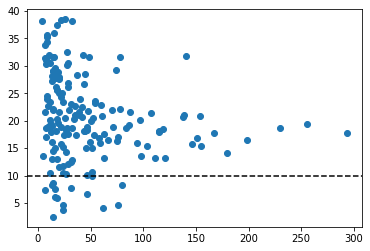

In [145]:
plt.scatter(dataO["Peak.2"],dataO.SigmaD)
plt.axhline(y=10, color='k', linestyle='--')

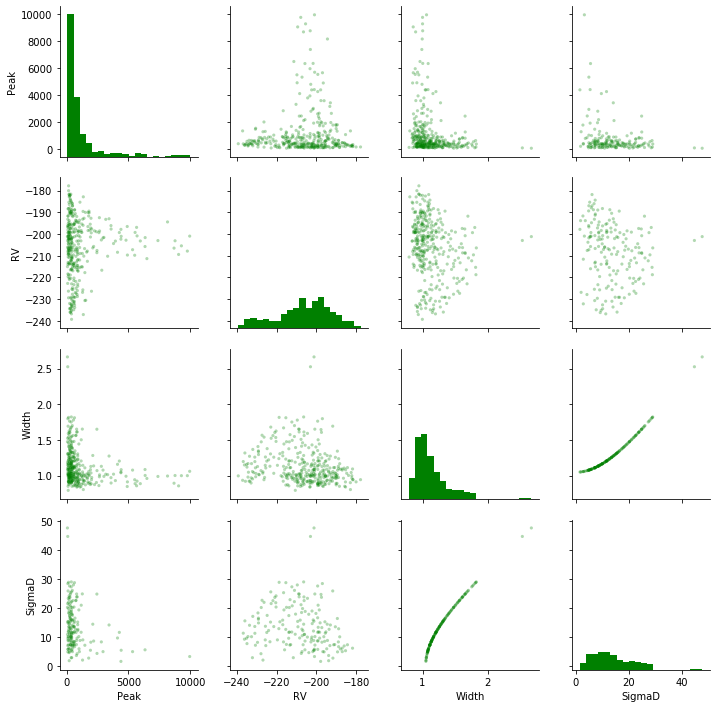

In [146]:
sns.pairplot(dataHs, 
             vars=["Peak","RV","Width","SigmaD"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none', color="green"),
             diag_kws=dict(bins=20, color="green"),
            )

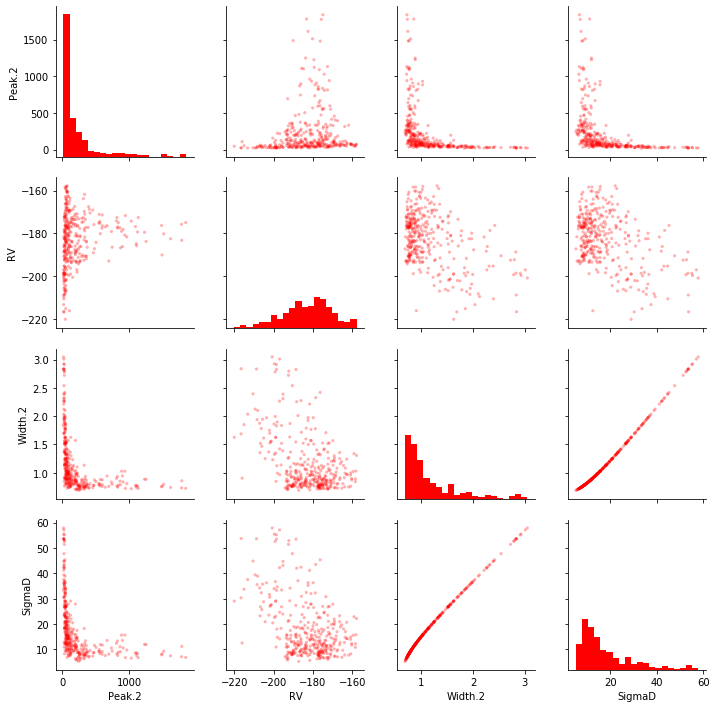

In [147]:
sns.pairplot(dataN, 
             vars=["Peak.2","RV","Width.2","SigmaD"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none', color="red"),
             diag_kws=dict(bins=20,color="red"),
            )

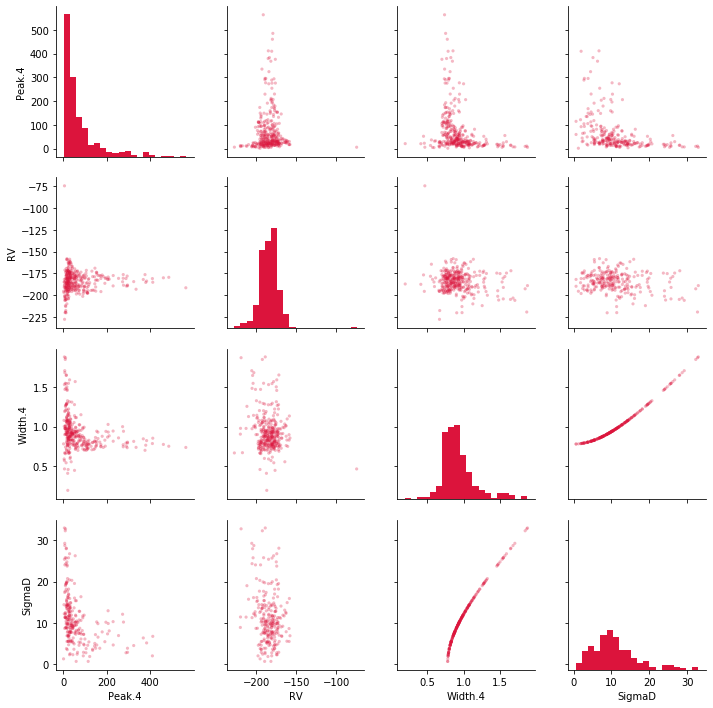

In [148]:
sns.pairplot(dataS, 
             vars=["Peak.4","RV","Width.4","SigmaD"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none', color="crimson"),
             diag_kws=dict(bins=20,color="crimson"),
            )

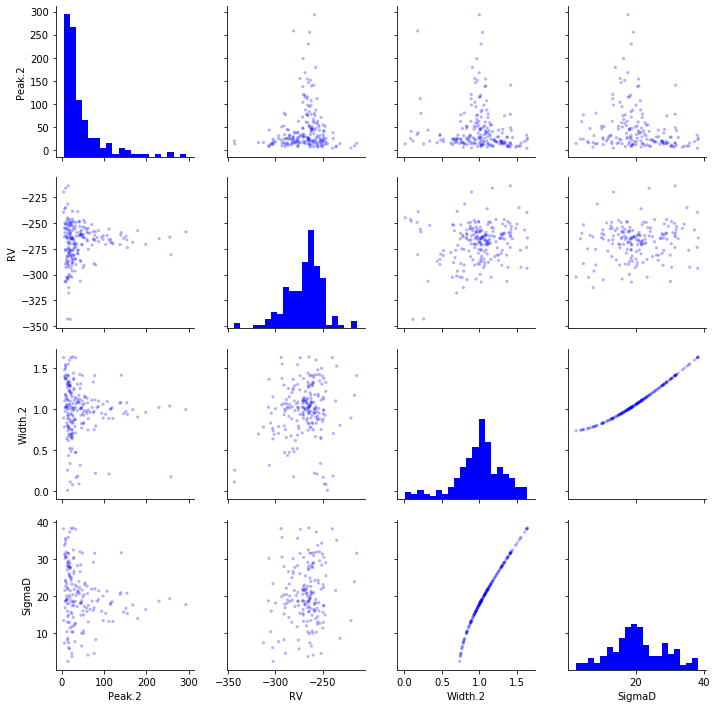

In [149]:
sns.pairplot(dataO, 
             vars=["Peak.2","RV","Width.2","SigmaD"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none', color="blue"),
             diag_kws=dict(bins=20,color="blue"),
            )

In [150]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 75.3943076133728 seconds ---
